## Plots of resonance/novelty

In [1]:
import pandas as pd
import os
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import matplotlib.font_manager
import datetime as dt

In [2]:
def set_base_plot_settings(fontsize, if_palette):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)
    
    if if_palette:
        #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
        palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    else:
        palette = 0
    
    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    return fig, ax1, palette

def set_late_plot_settings(if_dates):
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")
    if if_dates:
        # Define the date format
        ax1.xaxis_date()
        date_form = mdates.DateFormatter("%b-%Y")
        ax1.xaxis.set_major_formatter(date_form)

    return fig, ax1

In [3]:
file = "tweets_emo_date_W3_smoothed_150"
smooth = True

if smooth:
    filename = os.path.join("..","idmdl", "smoothed", f"{file}.csv")
else:
    filename = os.path.join("..","idmdl", f"{file}.csv")

df = pd.read_csv(filename)

df.head()

,Unnamed: 0,date,emo_prob,novelty,transience,resonance,nsigma,tsigma,rsigma,smoothed_transience,smoothed_novelty,smoothed_resonance
0,0,2019-01-01,"[0.13655387965800936, 0.13095321826100983, 0.3...",0.000000,0.007187,0.000000,0.000000,0.001711,0.000000,0.002523,0.000912,0.000458
1,1,2019-01-02,"[0.08091568521634232, 0.09035963937652772, 0.3...",0.000000,0.003413,0.000000,0.000000,0.001666,0.000000,0.002442,0.000947,0.000424
2,2,2019-01-03,"[0.08403529679919247, 0.0910697144345674, 0.30...",0.000000,0.001530,0.000000,0.000000,0.000498,0.000000,0.002361,0.000981,0.000391
3,3,2019-01-04,"[0.0866288507944467, 0.10716675546084177, 0.30...",0.003033,0.000656,0.002376,0.001695,0.000125,0.000910,0.002280,0.001016,0.000357
4,4,2019-01-05,"[0.08950032989547523, 0.11767038233149285, 0.2...",0.002756,0.001509,0.001246,0.002022,0.001012,0.001517,0.002199,0.001050,0.000323


In [4]:
df["date"] = pd.to_datetime(df["date"])

In [6]:
# event_dict is a dictionary of the events to be plotted
covid_dict = {
              "first lockdown": dt.datetime(2020, 3, 11),
              "Queens speech": dt.datetime(2020, 3, 17),
              "phase 1 reopning": dt.date(2020, 4, 14),
              "mask in public transport": dt.datetime(2020, 8, 22),
              "meet-up limit 50-10": dt.datetime(2020, 10, 23),
              "mink": dt.datetime(2020,11,4),
              "second lockdown": dt.datetime(2020, 12, 16),
              "first vaccine": dt.datetime(2020,12,27),
              "Pfizer approved": dt.datetime(2021, 1, 6),
              "lockdown extended": dt.datetime(2021, 1, 28),
              "AZ paused": dt.datetime(2021, 3, 11),
              "AZ withdrawn": dt.datetime(2021, 4, 4),
            #   "coronapas launced": dt.datetime(2021, 5, 27),
              # "announced restrictions-lifting": dt.datetime(2021, 8, 27),
              # "all restrictions lifted": dt.datetime(2021, 9, 10),
              }
holidays_dict = {
  "christmas 19": dt.datetime(2019,12,24),
  "new year 19": dt.datetime(2019,12,31),
  "christmas 20": dt.datetime(2020, 12, 24),
  "new year 20": dt.datetime(2020, 12, 31)
}


In [5]:
def plot_novelty_resonance(df, measure, axis_color='darkgrey', smooth=None, event_dict=None, save_fig = False, plot_name = None):
    fontsize = 20

    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    plt.rcParams['font.family'] = 'DejaVu Serif'
    a4_dims = (25,15)


    #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
    palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    if smooth:
      raw_color = palette[5]
      smooth_color = palette[0]
    else:
      raw_color = palette[0]


    locator = mdates.MonthLocator()  # every month
    date_form = mdates.DateFormatter("%b-%Y")
    X = plt.gca().xaxis
    X.set_major_locator(locator)
    

    x = df['date']
    y = df[measure]

    plt.plot(x, y, color=raw_color, alpha=0.8, label='Raw signal')

    if smooth:
      y_smoothed = df[f'smoothed_{measure}']
      plt.plot(x, y_smoothed, color=smooth_color, linewidth=3, label=f'Smoothed with span {smooth}')

    # events
    if event_dict:
      for event, time in event_dict.items():
          # plt.plot(time, y_smoothed[x == time],
          #         marker='o', markersize=20, markeredgecolor="black", markerfacecolor="None")
          plt.axvline(x=time, color='red', linestyle='--')
          plt.text(time, 0.007, #y_smoothed[x == time] + 0.001,
               s = event,
               fontdict = dict(color="black",size=15),
              #  bbox = dict(facecolor="white",alpha=0.5),
               rotation=90)


    # axis
    ax1.set(xlabel="")

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")#, alpha=0.5)
    # Define the date format
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(date_form)
    ax1.tick_params(axis='both', labelsize=20, colors=axis_color)
    ax1.yaxis.label.set_color(axis_color)
    # plt.xticks(rotation=90)
    every_nth = 3
    for n, label_ in enumerate(ax1.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label_.set_visible(False)

    plt.ylabel(measure.capitalize(), color=axis_color, size=35)

    plt.subplots_adjust(hspace=0.3)
    if save_fig:
        plt.savefig(plot_name)
    plt.show()

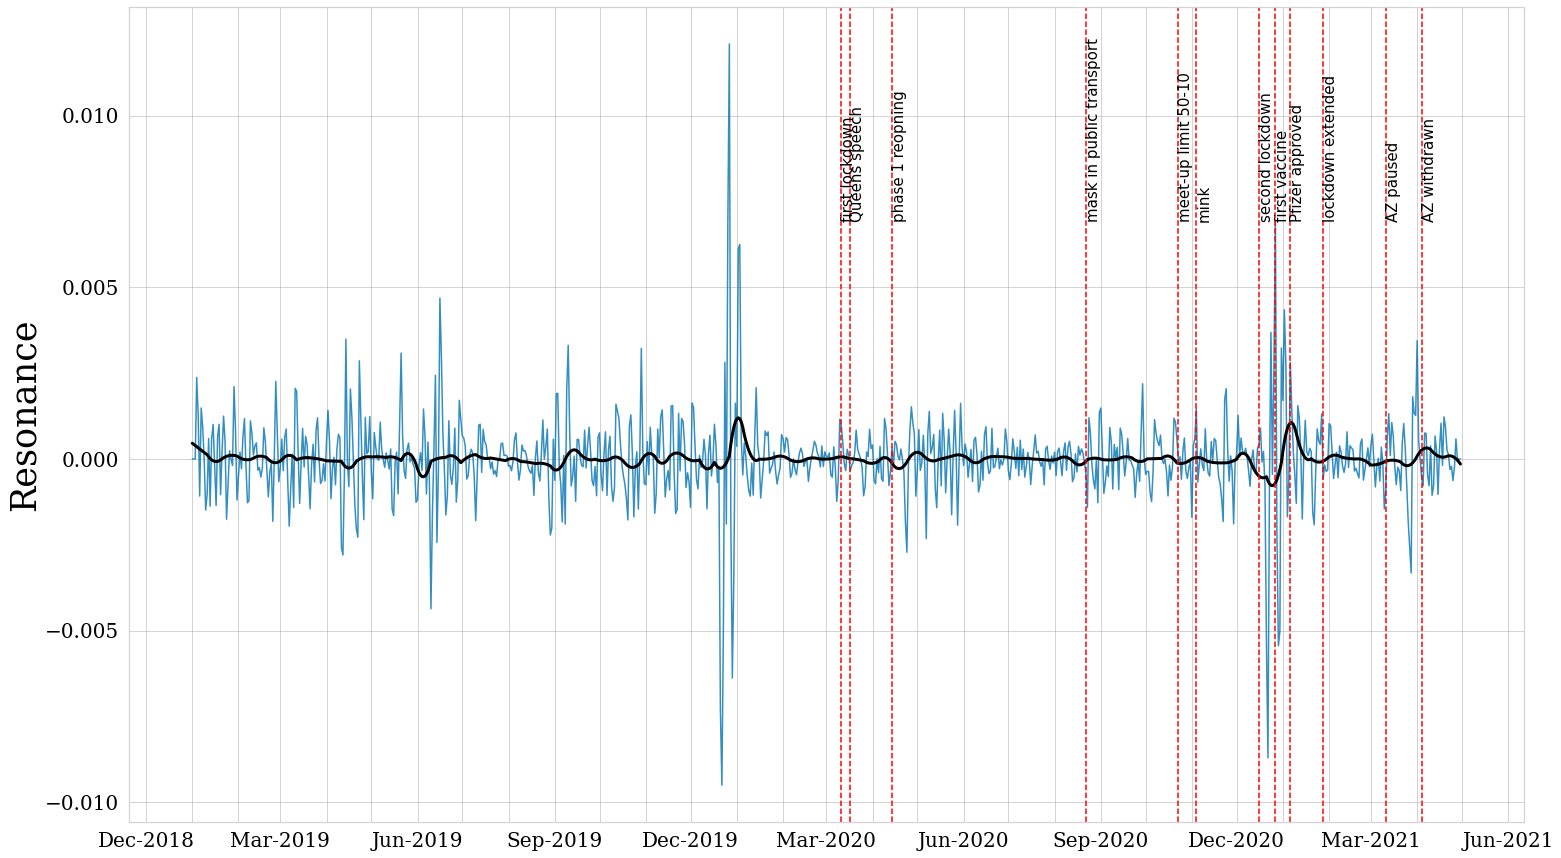

In [15]:
measure='resonance'
plot_novelty_resonance(df,measure=measure, smooth=150, axis_color='black', event_dict=covid_dict,
                       save_fig=False, plot_name=f'fig/W3_{measure}_covid_events.png')

In [6]:
def plot_two_signals(measure: str, df1, df2, label1=None, label2=None, fontsize=20, plot_name=None):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=True, ticks=False, fontsize=fontsize)
    plt.rcParams['font.family'] = 'DejaVu Serif'
    a4_dims = (25,15)

    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    
    plt.plot(df1["date"], df1[measure], color="#0072B2", alpha=0.7, linewidth=2, label = label1)
    plt.plot(df2["date"], df2[measure], color="#ef6d4c", alpha=0.5, linewidth=2, label = label2)
    
    if label1 and label2:
        plt.legend()
    ax1.xaxis_date()
    date_form = mdates.DateFormatter("%b-%Y")
    ax1.xaxis.set_major_formatter(date_form)
    ax1.tick_params(axis='both', colors='black')
    plt.ylabel(measure.capitalize(), color="black", size=35)
    
    if plot_name:
        plt.savefig(plot_name)
    plt.show()

In [7]:
# pol_file = os.path.join("..", "idmdl", "tweets_pol_date_W3.csv")
pol_file = os.path.join("..", "idmdl", "tweets_emo_noRT_date_W3.csv")
pol = pd.read_csv(pol_file)
pol["date"] = pd.to_datetime(pol["date"])

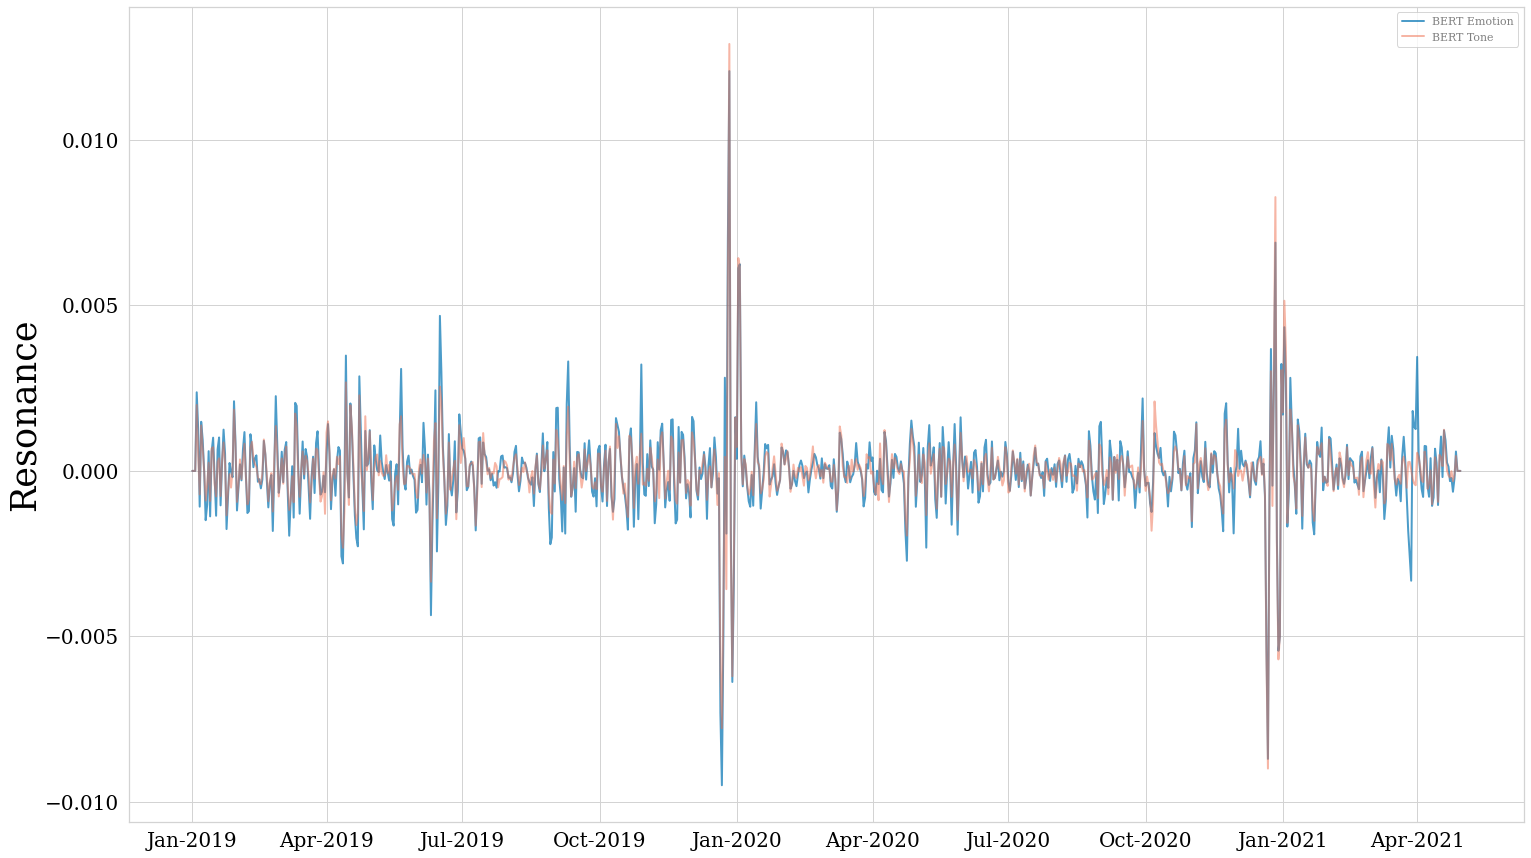

In [8]:
measure = "resonance"
plot_two_signals(measure, df, pol, label1='BERT Emotion', label2='BERT Tone', 
                 #plot_name=f"../fig/W3_{measure}_both_wlabels.png"
                )

In [6]:
emo_only_file = os.path.join("..", "idmdl", "tweets_emo_only_date_W3.csv")
emo_only = pd.read_csv(emo_only_file)
emo_only["date"] = pd.to_datetime(emo_only["date"])

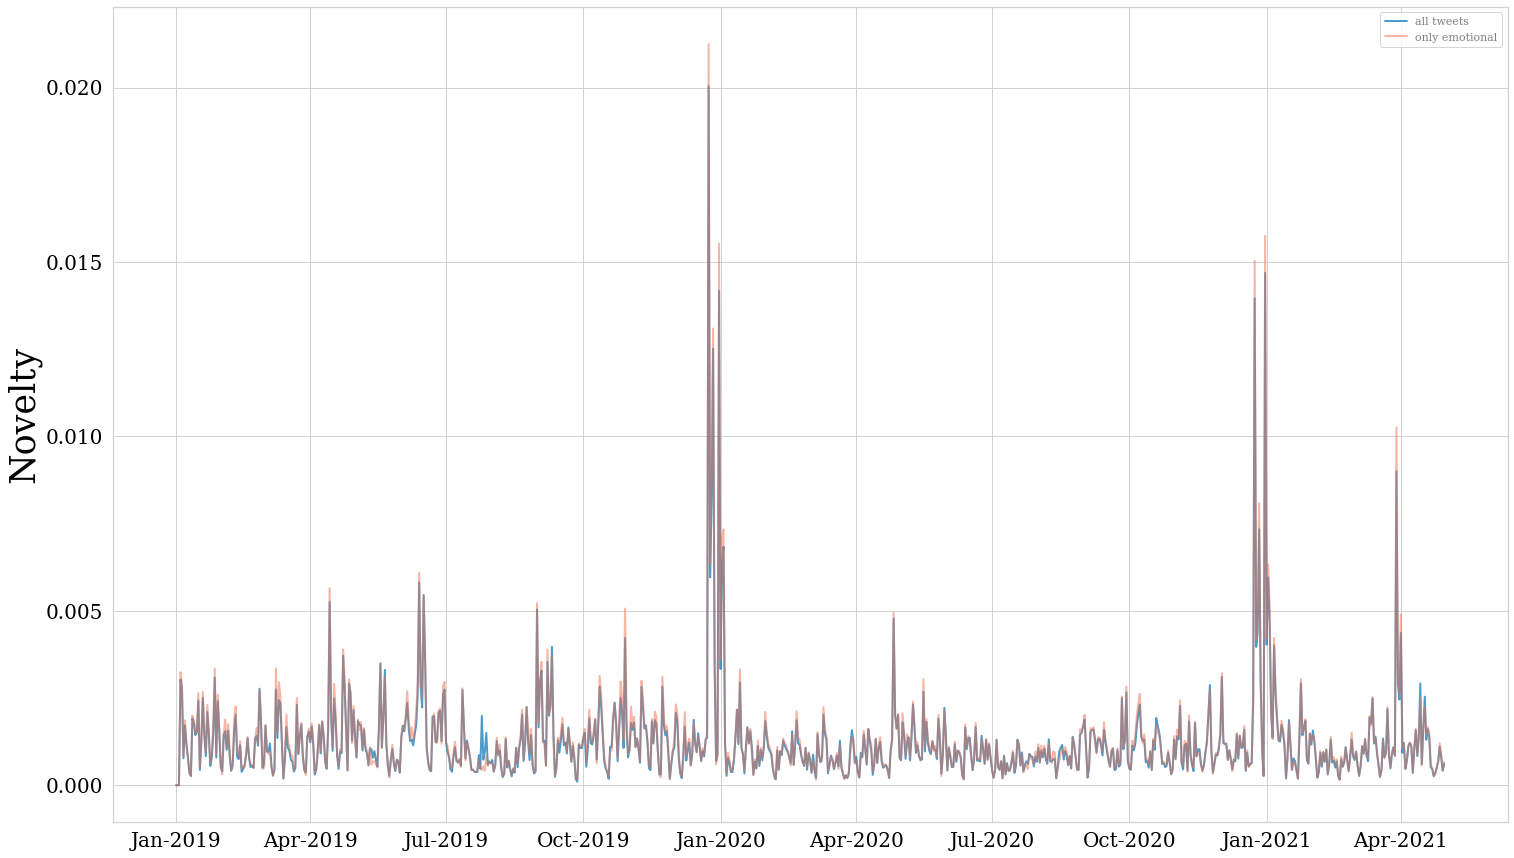

In [34]:
measure = "novelty"
plot_two_signals(measure, df, emo_only, label1='all tweets', label2='only emotional', plot_name=f"../fig/W3_{measure}_emo_only.png")

## Emotions driving the effect

In [8]:
labels = [
        "Glæde/Sindsro",
        "Tillid/Accept",
        "Forventning/Interrese",
        "Overasket/Målløs",
        "Vrede/Irritation",
        "Foragt/Modvilje",
        "Sorg/trist",
        "Frygt/Bekymret",
    ]

In [9]:
all_emo_dfs = []
for label in labels:
    filename = os.path.join("..", "idmdl", f"tweets_emo_date_W3_no_{label[:4]}.csv")
    df = pd.read_csv(filename)
    df["date"] = pd.to_datetime(df["date"])
    all_emo_dfs.append(df)
    # plot_novelty_resonance(df, label)
    # plot_novelty_resonance(df, label, save_fig=True, plot_name=f"../fig/res_nov_no_{label[:4]}.png")
all_emo = pd.read_csv(os.path.join("..", "idmdl", "tweets_emo_date_W3.csv"))
all_emo["date"] = pd.to_datetime(all_emo["date"])
all_emo_dfs.append(all_emo)



In [32]:
def plot_all_excluded(dfs:list, measure:str, ymin:float, ymax:float, stacked=False, 
                      save_fig=False, plot_name=None, labels = [
            "Glæde/Sindsro",
            "Tillid/Accept",
            "Forventning/Interrese",
            "Overasket/Målløs",
            "Vrede/Irritation",
            "Foragt/Modvilje",
            "Sorg/trist",
            "Frygt/Bekymret",
            "All emotions included"
        ]):
    fig, axs = plt.subplots(3,3, figsize = (20,10))
    labelsize = 8
    matplotlib.rc('xtick', labelsize=labelsize) 
    matplotlib.rc('ytick', labelsize=labelsize) 
    palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
   
    themes.theme_minimal(grid=True, ticks=False, fontsize=10)
    k = 0
    j = 0
    for i, emotion in enumerate(labels):
        # ax1 = fig.add_subplot()
        x = dfs[i]["date"]
        y = dfs[i][measure]
        if stacked:
            axs[k, j].plot(x, y, linewidth = 0.5, 
                           color=palette[5], label=emotion)
            x = dfs[-1]["date"]
            y = dfs[-1][measure]
            axs[k, j].plot(x, y, linewidth = 0.5, 
                           color=palette[7], alpha=0.7, label='all')
        else:
            axs[k, j].plot(x, y, label = f'{emotion} excluded', linewidth = 0.5)
        axs[k, j].xaxis.set_major_locator(plt.MaxNLocator(5))
        axs[k, j].axis(ymin=ymin, ymax=ymax)
        axs[k, j].set_title(f'{emotion} excluded', fontdict = {"fontsize": 13}, color = "Black")
        # if stacked:
        #     axs[k, j].legend()
        if k == 2 and j == 2:
            axs[k, j].set_title(f'{emotion}', fontdict = {"fontsize": 13}, color = "Black")
        j += 1
        if j > 2:
            k += 1
            j = 0
    fig.suptitle(measure.capitalize(), fontsize=30, color="Black")
    plt.subplots_adjust(hspace=0.3)

    if save_fig:
        plt.savefig(plot_name)
    plt.show()

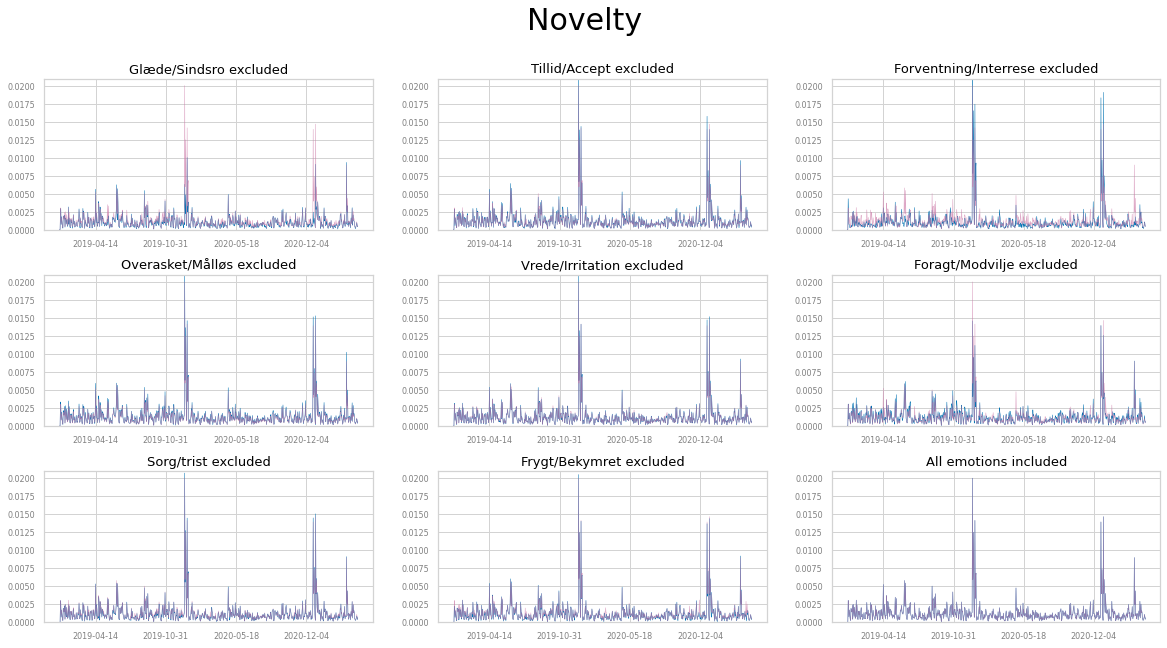

In [33]:
plot_all_excluded(all_emo_dfs, "novelty", ymin=0, ymax=0.021, stacked=True)#, save_fig=True, plot_name=f"../fig/novelty_emotions_excluded_all.png") 

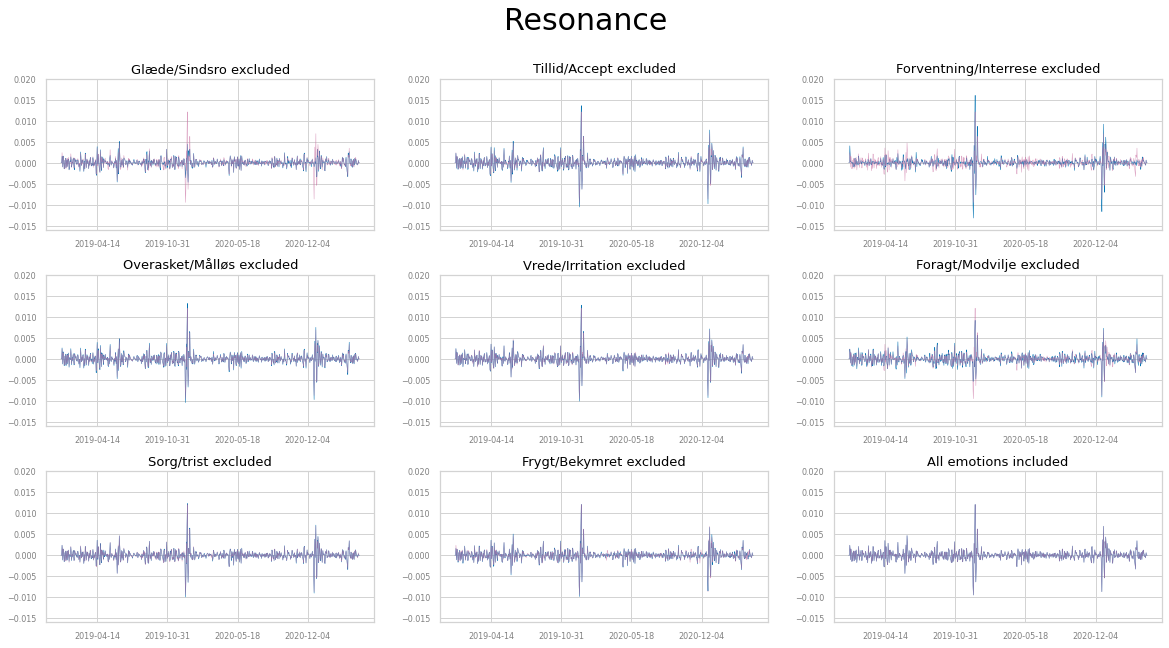

In [34]:
plot_all_excluded(all_emo_dfs, "resonance", ymin=-0.016, ymax=0.02, stacked=True)#, save_fig=True, plot_name=f"../fig/resonance_emotions_excluded_all.png")

## Emotion distributions

In [8]:
tweets = pd.read_csv('/home/commando/stine-sara/data/emotion_tweets_2021.csv', nrows=100)

In [9]:
import ndjson

def ndjson_gen(filepath: str):
    with open(filepath) as f:
        reader = ndjson.reader(f)

        for post in reader:
            yield post

In [10]:
import re

# non-emotional: 19,21,36,56
# very certain: 1, 99
# more uncertain: 6, 7
# 4 is emotional, but neutral
index = 99

tweet_id = str(tweets['id'][index])

emo = tweets['Bert_emo_emotion_prob'][index]

emo_list = re.split(r'\s+', emo[1:-1])[:8]
emo_list = list(map(lambda x: float(x), emo_list))

In [11]:
print(emo_list, tweet_id)

[0.001, 0.0, 0.001, 0.0, 0.001, 0.002, 0.985, 0.011] 1388275051280142336


In [12]:
filepath = os.path.join('/data', '004_twitter-stopword', 'da_stopwords_part1_2021-01-01_2021-04-30.ndjson')

for i, post in enumerate(ndjson_gen(filepath)):
    if post['id'] == tweet_id:
        # print(post['text'])
        break

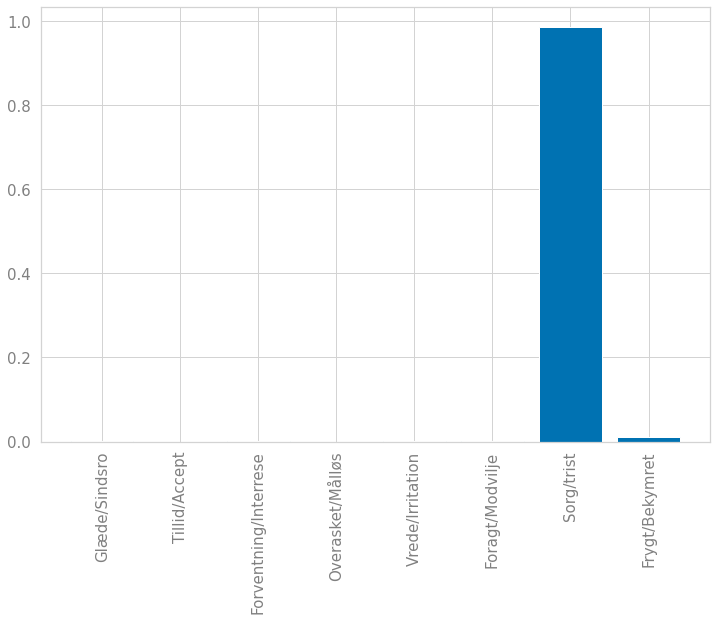

In [13]:
emotion_int = [1,2,3,4,5,6,7,8]

emotion_labels = [
        "Glæde/Sindsro",
        "Tillid/Accept",
        "Forventning/Interrese",
        "Overasket/Målløs",
        "Vrede/Irritation",
        "Foragt/Modvilje",
        "Sorg/trist",
        "Frygt/Bekymret",
    ]

labelsize = 15
matplotlib.rc('xtick', labelsize=labelsize) 
matplotlib.rc('ytick', labelsize=labelsize) 

themes.theme_minimal(grid=True, ticks=False, fontsize=10)

plt.bar(emotion_int, emo_list, align='center', color="#0072B2")
plt.xticks(emotion_int, emotion_labels)
plt.xticks(rotation=90)
plt.show()